<a href="https://colab.research.google.com/github/inggriantip/skripsi/blob/master/sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt


In [9]:
#load dataset
dataset = pd.read_csv('/content/drive/My Drive/DataSet/cardio.csv')
print (len(dataset))
#dataset.Type.value_count().plot(kind= "bar")
dataset

70000


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#replace NaN
zero_not_accepted = [ 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco']

for colum in zero_not_accepted:
   # dataset [colum] = dataset[colum].replace(0, np.NaN)
    mean = int(dataset[colum].mean(skipna=True))
    dataset[colum] = dataset[colum].replace(np.NaN, mean)

In [0]:
#split target and attribute
x = dataset.iloc[:, 1:10]
y = dataset.iloc[:, 10]
#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)
print(len( ))
print(len(x_train))
print(len(dataset))

7000
63000
70000


Text(0.5, 1.0, 'testing')

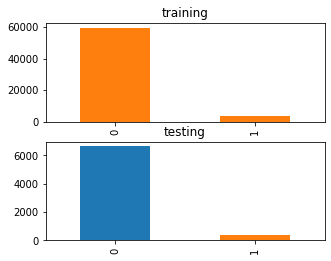

In [0]:
x_train
x_test
y_train
len(y_test)

pp.figure(figsize=(5,4))
pp.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C1','C1','C2','C3','C4','C5','C6']);pp.title('training')
pp.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);pp.title('testing')

AttributeError: 'Series' object has no attribute 'value_count'

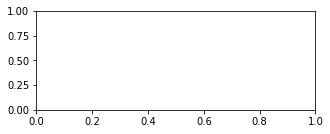

In [0]:
pp.figure(figsize=(5,4))
pp.subplot(2,1,1,);y_train.value_count().plot(kind='pie');pp.title('training')
pp.subplot(2,1,2);y_test.value_count().plot(kind='pie');pp.title('testing')

In [0]:
# scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test =sc_x.fit_transform(x_test)
x_train

array([[-1.43189008, -0.7347468 ,  0.80793253, ..., -0.54039178,
        -0.39585685, -0.31090676],
       [-0.58084582, -0.7347468 ,  1.2948251 , ..., -0.54039178,
        -0.39585685, -0.31090676],
       [ 1.34616153, -0.7347468 ,  0.07759367, ..., -0.54039178,
        -0.39585685, -0.31090676],
       ...,
       [ 1.18081579,  1.36101307,  1.17310196, ..., -0.54039178,
        -0.39585685, -0.31090676],
       [-0.46615748, -0.7347468 , -1.38308404, ..., -0.54039178,
        -0.39585685, -0.31090676],
       [ 0.38610256,  1.36101307,  0.56448624, ..., -0.54039178,
        -0.39585685, -0.31090676]])

In [0]:
math.sqrt(100)

10.0

In [0]:
#choose method and fitting
classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#testing data
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [0]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Score :" , f1_score(y_test, y_pred, average=None))

[[6548   87]
 [ 331   34]]
Akurasi : 0.9402857142857143
presisi : [0.95188254 0.28099174]
recall : [0.98688772 0.09315068]
F-Score : [0.96906911 0.1399177 ]


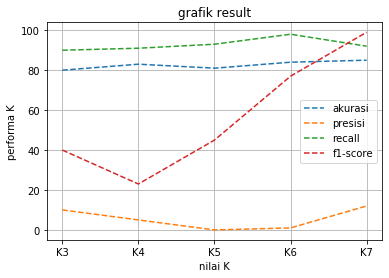

In [0]:
from matplotlib import pyplot as plot
x = ["K3", "K4", "K5", "K6", "K7"]
a= [80,83,81,84,85]
p= [10,5,0,1,12]
r= [90,91,93,98,92]
f= [40,23,45,77,99]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result")
plt.xlabel("nilai K")
plt.ylabel("performa K")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()